# 随机变量的数字特征

!!! note "本文在Immortal-Fates的笔记和肖朦老师课件的基础之上修改；"

## 期望 | mean

- 离散：$E(X)=\sum x_kp_k$

- 连续：$E(X)=\int_{-\infty}^{+\infty}xf(x)dx$

> E(X)必须收敛，无穷级数发散则不存在数学期望


- $X\sim N(\mu,\sigma^2)$,标准正态变量$Z=\frac{X-\mu}{\sigma},E(Z)=0,Var(Z)=1$,$E(X)=\mu,Var(X)=\sigma^2$

### 随机变量函数的数学期望

$Y=g(X)$（连续函数）——可推广到多元

- 离散：$E(Y)=\sum g(x_k)p_k$
- 连续：$E(Y)=\int_{-\infty}^{+\infty}g(x)f(x)dx$

$Z=h(X,Y)$（连续函数）

- 离散：$E(Z)=\sum\sum h(x_i,y_i)p_{ij}$
- 连续：$E(Z)=\int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}h(x,y)f(x,y)dxdy$

> 不必管Y怎样，只用X即可算出	

!!! note "例: 平均速度和平均时间。假设上学路途共2公里，天气好时（概率0.6），步行上学，速度5公里/小时，天气不好时，骑车上学，速度30公里/小时。求上学平均用时。"
    t = 2/v = g(v) = 2/5 * 0.6 + 2/30 * 0.4 = 4/15 小时
    不能先求出v的期望，再求t的期望，因为v和t不是线性关系

### 特性

- 数学期望有线性性质
- 若X，Y相互独立，则$E(XY)=E(X)E(Y)$
- 将X分解成数个随机变量之和，然后利用随机变量和的数学期望等于随机变量数学期望之和来求数学期望
- 泊松分布的均值和方差都是$\lambda$

## 方差 | variance
### 定义
$Var(X)=E\{[X-E(X)]^2\}$，刻画分散程度
- 离散：$Var(X)=\sum [x_k-E(X)]^2p_k$
- 连续：$Var(X)=\int_{-\infty}^{+\infty}[x_k-E(X)]^2f(x)dx$
- $Var(X)=E(X^2)-[E(X)]^2$
- 标准差（均方差）：$\sigma(X)=\sqrt{Var(X)}$

### 性质

  - $Var(C)=0,Var(CX)=C^2Var(X)$

  - $Var(X+Y)=Var(X)+Var(Y)+2E\{[X-E(X)][Y-E(Y)]\}$

    若X，Y相互独立，则$Var(X+Y)=Var(X)+Var(Y)$

  - 若X，Y相互独立：则$Var(aX+bY+c)=a^2Var(X)+b^2Var(Y)$

- 独立的n个正态变量的线性组合仍服从正态分布

  $C_0+C_1X_1+...\sim N(C_0+C_1\mu_1+...,C_1^2\sigma_1^2+C_2^2\sigma_2^2+...)$


```python
np.var(x,ddof=1) # 样本方差
np.std(x,ddof=1) # 样本标准差
```

In [3]:
##计算均匀分布的各种数学特征

import scipy.stats as st
a,b=(0,10)
mean, var, skew, kurt = st.randint.stats(a,b+1, moments='mvsk') ## n阶中心矩

print(mean, var, skew, kurt)
print (st.randint.mean(a,b+1),st.randint.var(a,b+1))

5.0 10.0 0.0 -1.22
5.0 10.0


5.0 4.927
10.0 10.155826826826827
3.1622776601683795 3.1868208024341165


DescribeResult(nobs=1000, minmax=(np.int64(0), np.int64(10)), mean=np.float64(4.927), variance=np.float64(10.155826826826829), skewness=np.float64(0.04849851798763294), kurtosis=np.float64(-1.2471185326073))

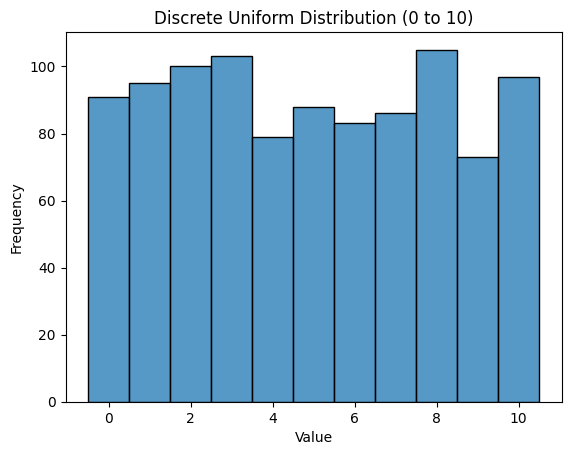

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
x=st.randint.rvs(a,b+1,size=1000)
sns.histplot(x,discrete=True)
plt.title(f'Discrete Uniform Distribution ({a} to {b})')
plt.xlabel('Value')
plt.ylabel('Frequency')

print(st.randint.mean(a,b+1),np.mean(x))
print(st.randint.var(a,b+1),np.var(x,ddof=1)) # dof=n-1 为无偏估计 ddof 是 deduce degree of freedom
print(st.randint.std(a,b+1),np.std(x,ddof=1))
st.describe(x)

![image-20231121203607956](https://raw.githubusercontent.com/Immortal-Fates/image_host/main/blog/image-20231121203607956.png)

## 协方差 | covariance

协方差度量了随机变量之间的线性关系。

$$
\operatorname{cov}(X, Y) = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]
$$

- $Cov(X,Y)=E(XY)-E(X)E(Y)$
- 有线性性质（把Cov想象成内积）
- $Var(X+Y) = Var(X) + Var(Y) +2Cov(X,Y)$

协方差的性质：

1. $Cov(X, Y) = Cov(Y, X)$
2. 方差是协方差的特例：$Cov(X, X) = \text{Var}(X)$
3. $Cov(aX, bY) = ab \cdot Cov(X, Y)$，其中 $a, b$ 为两个实数
4. $Cov(X_1 + X_2, Y) = Cov(X_1, Y) + Cov(X_2, Y)$
5. 当 $\text{Var}(X) \text{Var}(Y) \neq 0$ 时，有
   
$$
(Cov(X, Y))^2 \leq \text{Var}(X) \text{Var}(Y)
$$

   其中等号当且仅当 $X$ 与 $Y$ 之间有严格的线性关系，即存在常数 $a, b$，使 $P(Y = a + bX) = 1$。

$$
\mathrm{Cov}(aX+bY,cX+dY)=acD(X)+(ad+bc)\mathrm{Cov}(X,Y)+bdD(Y)
$$


$$
D(aX+bY+c)=a^2D(X)+2ab\mathrm{Cov}(X,Y)+b^2D(Y)
$$


> 正态分布协方差：$\rho \sigma_1\sigma_2$

### 协方差矩阵
对于一个有 $n$ 个随机变量的随机向量 $\mathbf{X} = (X_1, X_2, \ldots, X_n)^T$，其协方差矩阵 $\mathbf{\Sigma}$ 是一个 $n \times n$ 的矩阵，其元素表示各个随机变量之间的协方差。

协方差矩阵描述了多个变量之间的协方差关系，矩阵的对角线元素是方差，非对角线元素是协方差

$$
\mathbf{\Sigma} = \begin{pmatrix}
Cov(X_1, X_1) & Cov(X_1, X_2) & \cdots & Cov(X_1, X_n) \\
Cov(X_2, X_1) & Cov(X_2, X_2) & \cdots & Cov(X_2, X_n) \\
\vdots & \vdots & \ddots & \vdots \\
Cov(X_n, X_1) & Cov(X_n, X_2) & \cdots & Cov(X_n, X_n)
\end{pmatrix}
$$

对于任意两个随机变量 $X_i$ 和 $X_j$，其协方差 $Cov(X_i, X_j)$ 定义为：

$$
Cov(X_i, X_j) = E[(X_i - E[X_i])(X_j - E[X_j])]
$$

其中，$E[X_i]$ 表示随机变量 $X_i$ 的期望值。

对于一个随机向量 $\mathbf{X}$，其协方差矩阵 $\mathbf{\Sigma}$ 也可以表示为：

$$
\mathbf{\Sigma} = E[(\mathbf{X} - E[\mathbf{X}])(\mathbf{X} - E[\mathbf{X}])^T]
$$

其中，$E[\mathbf{X}]$ 表示随机向量 $\mathbf{X}$ 的期望向量，$(\mathbf{X} - E[\mathbf{X}])^T$ 表示 $(\mathbf{X} - E[\mathbf{X}])$ 的转置。



## 相关系数
**线性关系**紧密程度

$\rho_{XY}=\frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}}=Cov(\frac{X-E(X)}{\sqrt{Var(X)}},\frac{Y-E(Y)}{\sqrt{Var(Y)}})=\rho$

- $|\rho_{XY}|\le 1$

- $|\rho_{XY}| = 1 \Leftrightarrow$ 存在常数 $a, b$，使 $P(Y = a + bX) = 1$； 特别的，$\rho_{XY} = 1$ 时，$b > 0$；$\rho_{XY} = -1$ 时，$b < 0$

- 当$\rho_{XY}>0$时，称X与Y为正相关

- 当$\rho_{XY}<0$时，称X与Y为负相关

- 当$\rho_{XY}=0$时，称X与Y为不相关或零相关


随机变量 $X$ 与 $Y$ 不相关，即 $\rho_{XY} = 0$ 等价条件有：

1. $\text{Cov}(X, Y) = 0$
2. $E(XY) = E(X)E(Y)$
3. $\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y)$

从而可知，当 $X$ 与 $Y$ 相互独立 $\Rightarrow X$ 与 $Y$ 一定不相关；反之，若 $X$ 与 $Y$ 不相关，$X$ 与 $Y$ 却不一定相互独立。


> 对于二元正态变量（X，Y）来说，X和Y不相关等价于X与Y相互独立
> 注意变换，避免硬算

## 其他数字特征

### skewness | 偏度

### kurtosis | 峰度

### 矩

### 分位数

$P\{X>x_\alpha\}=\alpha$的实数$x_\alpha$为X的上$\alpha$分位数



- n元随机变量X的数学期望（向量）——每个分量都是自己的数学期望


### n元正态变量的性质：
- ![image-20231128231151737](https://raw.githubusercontent.com/Immortal-Fates/image_host/main/blog/image-20231128231151737.png)
- 正态变量的线性变换不变性
- 服从n元正态分布，协方差矩阵为对角矩阵——变量相互独立——变量两两不相关

- n元正态分布$\sim N(a,B),B$就是协方差矩阵